In [6]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("survey lung cancer.csv")

x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [7]:
# print(x)
# print("\n",y)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# print(dataset['GENDER'])
x[:,0] = np.array(le.fit_transform(x[:,0]))  #ENCODE GENDER FEATURE
# print(x[:,0])

y = np.array(le.fit_transform(y))   #ENCODING LUNG_CANCER FEATURE
# print(y)

GENDER
M    162
F    147
dtype: int64


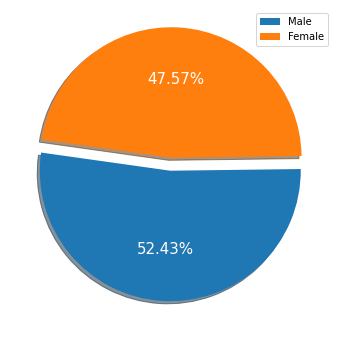

In [9]:
import matplotlib.pyplot as plt


g = dataset.value_counts("GENDER")
print(g)

plt.figure(figsize=(6,6))
plt.pie(g, labels=['Male','Female'], autopct="%.2f%%", textprops={"fontsize":15, "color":"w"}, explode=[0, 0.1], shadow=True, startangle=172)
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [11]:
# print(x_train,x_test,y_train,y_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

classifiersvm = SVC(kernel = 'linear', C= 0.25, gamma= 0.1, random_state = 0)
classifiersvm.fit(x_train, y_train)
x_predictsvm = np.array(x_test[:,:])
accuracysvm = classifiersvm.score(x_test,y_test)

# classifierrf = RandomForestClassifier(random_state=1)
# classifierrf.fit(x_train, y_train)
# x_predictrf = np.array(x_test[:,:])
# accuracyrf = classifierrf.score(x_test,y_test)

# classifiergbm = GradientBoostingClassifier(n_estimators=10)
# classifiergbm.fit(x_train, y_train)
# x_predictgbm= np.array(x_test[:,:])
# accuracygbm = classifiergbm.score(x_test,y_test)

# classifierNB = GaussianNB()
# classifierNB.fit(x_train, y_train)
# x_predictNB = np.array(x_test[:,:])
# accuracyNB = classifierNB.score(x_test,y_test)

# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(x_train, y_train)
# x_predict = np.array(x_test[:,:])
# accuracy = classifier.score(x_test,y_test)


# print(accuracy)
# print(accuracyNB)
# print(accuracyrf)
# print(accuracygbm)
print(accuracysvm)

0.8709677419354839


In [13]:
import pickle
pickle.dump(classifiersvm, open('model.pkl','wb'))